<h2 style="font-size:24pt"> Proyecto DESI</h2>

<h2 style="font-size:24pt"> Julio 11, 2025</h2>

<p style="font-size:16pt">
Vsualization groups: filaments with real data, knots with real data, and voids with random data.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd
import re
from astropy.io import ascii
import networkx as nx
from sklearn.decomposition import PCA

In [7]:
filaments = {}
for j in range(100):
    file = f"filament_rosette/LRG_filament_rosette_0_random_{j}.ecsv"
    table = Table.read(file, format="ascii.ecsv")
    filaments[f'rosetta_0_random_{j}'] = table

In [14]:
data = "data_rosette/LRG_0_clustering_data.ecsv"
data_rosette0 = Table.read(data, format="ascii.ecsv")

In [66]:
data_rosette0 = data_rosette0[['TARGETID', 'x', 'y', 'z']]
data_rosette0_df = data_rosette0.to_pandas()


# Crear grafo de conexiones
G = nx.Graph()
df_filaments_df = filaments['rosetta_0_random_0'].to_pandas()  # conversión a pandas

# Agregar aristas entre nodos conectados
edges = list(zip(df_filaments_df['TARGETID'], df_filaments_df['TARGETID_filament']))
G.add_edges_from(edges)

# ID de partida
id_inicial = df_filaments_df['TARGETID'].iloc[0]

# Obtener todos los nodos en el mismo componente conexo
if id_inicial in G:
    grupo = list(nx.node_connected_component(G, id_inicial))
    df_grupo = data_rosette0_df[data_rosette0_df['TARGETID'].isin(grupo)].copy()
    df_grupo['filament_id'] = id_inicial
else:
    print("El ID no está en el grafo de conexiones.")
    df_grupo = pd.DataFrame()


In [45]:
def alignment(df):
    if hasattr(df, 'to_pandas'):  # si es Table de Astropy
        df = df.to_pandas()
    coords = df[['x', 'y', 'z']].values.astype(float)  # fuerza conversión
    pca = PCA(n_components=3)
    coords_rotated = pca.fit_transform(coords)
    return coords_rotated

In [ ]:
new_coord = alignment(data_rosette0)
data_rosette0_df[['x_rot', 'y_rot', 'z_rot']] = new_coord

In [57]:
filtrados = data_rosette0_df[data_rosette0_df['TARGETID'].isin(grupo)].copy()

In [58]:
filtrados

,TARGETID,x,y,z,x_rot,y_rot,z_rot
76,39627811404648986,-1706.309621,976.505078,35.121825,816.209651,-40.917933,2.188631
165,39627805364850036,-1713.308469,983.208334,27.526409,807.111598,-48.035564,6.451566
422,39627811400453679,-1681.093258,974.741468,34.474239,839.030935,-38.034374,12.689523
560,39627811404648406,-1705.599955,977.204238,35.559620,816.466009,-40.248658,3.007451
641,39627811408843157,-1695.497326,960.362857,35.214562,833.555009,-42.330252,-6.450209
711,39627823488435832,-1693.468136,965.083441,47.670016,832.523430,-29.031436,-4.548316
856,39627817452830824,-1697.347190,960.205328,41.356165,831.790955,-36.694421,-8.958520
937,39627811400454688,-1723.442637,997.425244,30.772577,791.177091,-43.661453,12.956803
1224,39627817444444059,-1711.380630,984.826654,45.487373,807.310229,-30.025377,4.324250
1435,39627805360657531,-1734.100458,1002.015095,23.805262,779.913681,-51.143211,13.555352


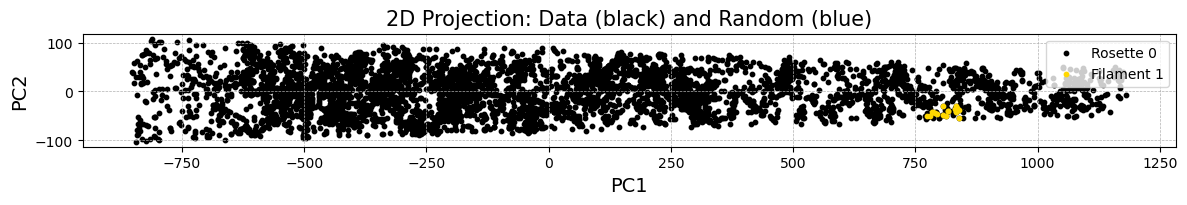

In [60]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(new_coord[:, 0], new_coord[:, 1], c='k', s=10, label='Rosette 0')
ax.scatter(filtrados['x_rot'], filtrados['y_rot'], c='gold', s=10, label='Filament 1')

ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend()
ax.set_title('2D Projection: Data (black) and Random (blue)', fontsize=15)

plt.tight_layout()

plt.show()

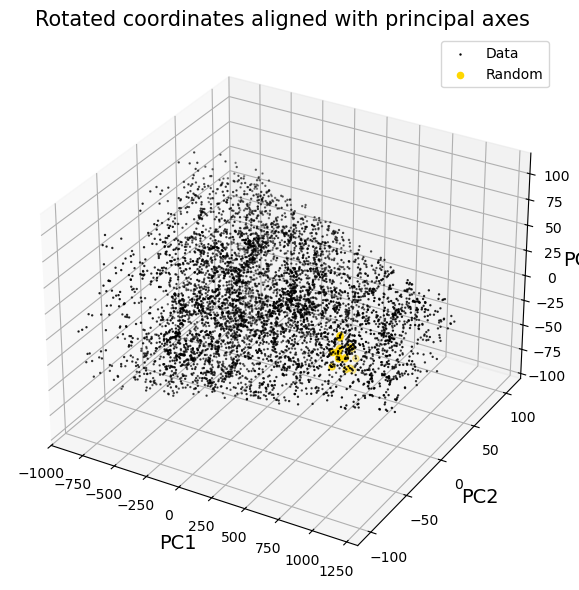

In [63]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_coord[:, 0], new_coord[:, 1], new_coord[:, 2], c='k', s=0.5, label='Data')

ax.scatter(filtrados['x_rot'], filtrados['y_rot'], filtrados['z_rot'], c='gold', s=20, label='Random')

ax.set_xlabel('PC1', size=14)
ax.set_ylabel('PC2', size=14)
ax.set_zlabel('PC3', size=14)
ax.set_title('Rotated coordinates aligned with principal axes', fontsize=15)
ax.legend()

plt.tight_layout()
plt.show()